# Simple Linear Regression | Simply Handling Model 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement/placement.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv('/kaggle/input/placement/placement.csv')

df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.drop(columns= 'Unnamed: 0', inplace= True)

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'iq (in lpa)')

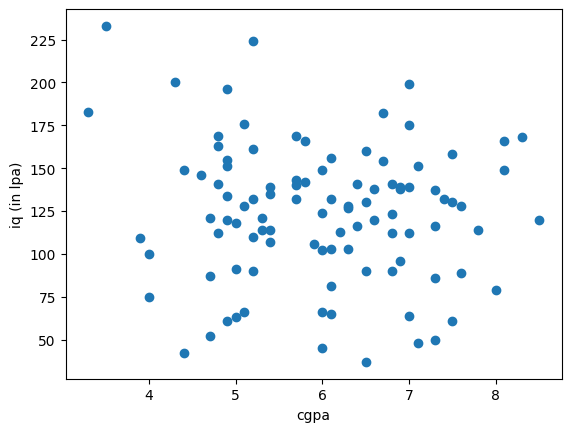

In [8]:
plt.scatter(df['cgpa'], df['iq'])
plt.xlabel('cgpa')
plt.ylabel('iq (in lpa)')

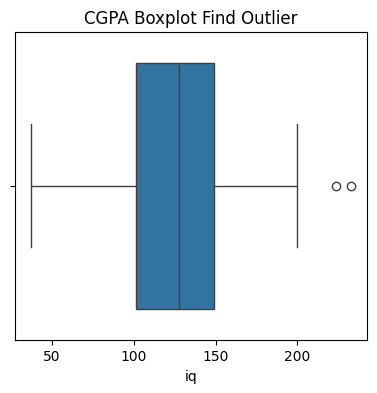

In [9]:
plt.figure(figsize= (10, 4))
plt.subplot(1,2,2)
sns.boxplot(data= df, x= df['iq'])
plt.title('CGPA Boxplot Find Outlier')


# plt.subplot(1,2,1)
# sns.boxplot(data= df, x= df['iq'])
# plt.set_title('CGPA Boxplot Find Outlier')

plt.show()

In [10]:
#outlier detection

percentile25= df['iq'].quantile(0.25)
percentile75= df['iq'].quantile(0.75)

iqr= percentile75 - percentile25


upper_limit= percentile75 + 1.5*iqr
lower_limit= percentile25 - 1.5*iqr

In [11]:
df = df[(df['iq'] >= lower_limit) & (df['iq'] <= upper_limit)]

<Axes: xlabel='iq'>

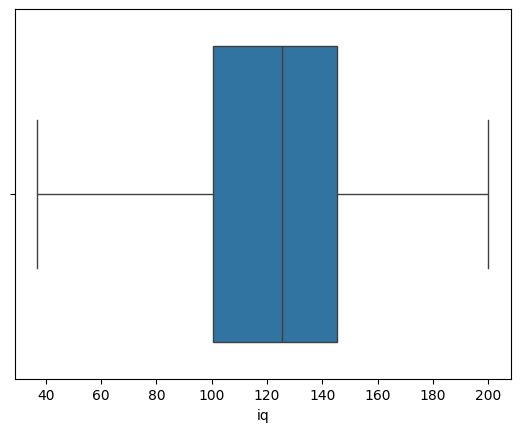

In [12]:
sns.boxplot(x= df['iq'])

In [13]:
df.shape

(98, 3)

In [14]:
X= df.iloc[:, 0:2]
y= df.iloc[:, -1]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 2)

In [16]:
X_train.shape

(78, 2)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train, y_train)
X_test_scaled= scaler.transform(X_test)

In [18]:
print(X_train_scaled.dtype)

float64


In [19]:
original_columns = ['cgpa', 'iq']

In [20]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= original_columns)

Text(0, 0.5, 'IQ Graph whit SS')

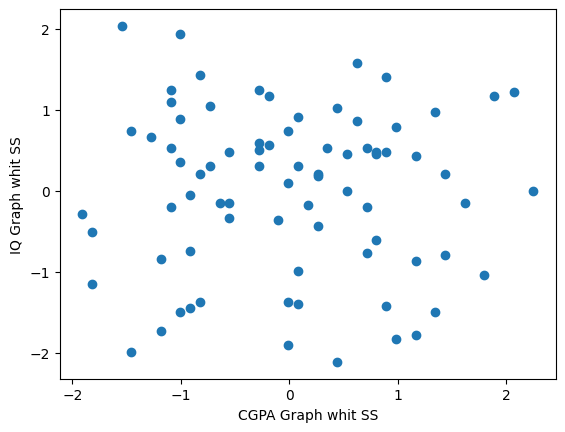

In [21]:
plt.scatter(X_train_scaled_df['cgpa'], X_train_scaled_df['iq'])
plt.xlabel('CGPA Graph whit SS')
plt.ylabel('IQ Graph whit SS')

In [22]:
#using algorithms logisticregression

from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
#using algorithms KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
#using algorithms RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators= 50)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

for model in [LR, knn, rf]:
    y_pred= model.predict(X_test)
    print(model.__class__,__name__)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

<class 'sklearn.linear_model._logistic.LogisticRegression'> __main__
Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.53      0.90      0.67        10

    accuracy                           0.55        20
   macro avg       0.60      0.55      0.49        20
weighted avg       0.60      0.55      0.49        20

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> __main__
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

<class 'sklearn.ensemble._forest.RandomForestClassifier'> __main__
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00     